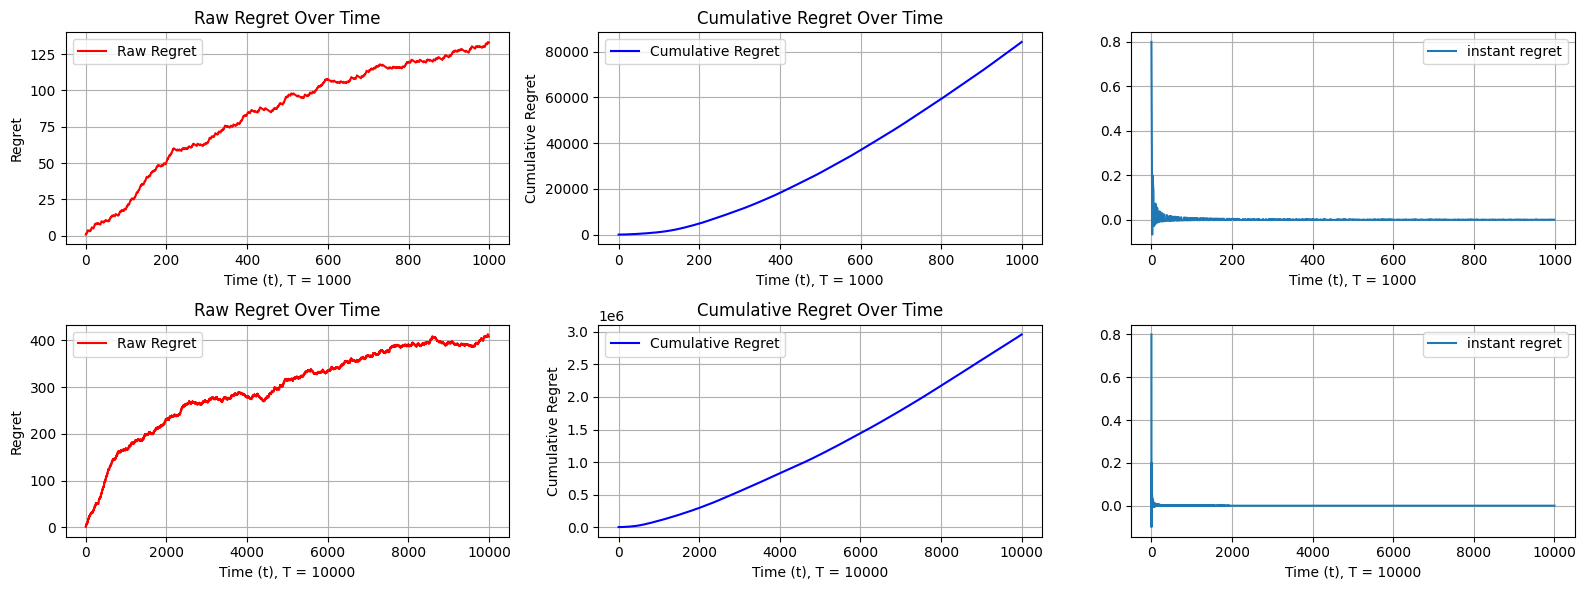

In [2]:
# Assignment

# Description:
#   Random users access news. Choose articles to show each user that 
#   will maximize the chance the user clicks on it
#
#   propability of a user clicking article i (i = 1...K) is pi. Differs for each user.
#
#   Users specifications: Male, female, over or under 25 years old.
#   
#   female over 25:             p0 = 0.8, p1 = 0.6, p2 = 0.5, p3 = 0.4, p4 = 0.2
#   male over 25:               p0 = 0.2, p1 = 0.4, p2 = 0.5, p3 = 0.6, p4 = 0.8
#   male or female under 25:    p0 = 0.2, p1 = 0.4, p2 = 0.8, p3 = 0.6, p4 = 0.5


# Implementation of the UCB algorithm

# algo:
#   ucb_i(t) = μ_i(t) + sqrt(2logT / N_i(t))
#   play arm j: ucb_j(t) >= ucb_i(t)



import numpy as np
import math
import matplotlib.pyplot as plt


# 5 new articles 
K = 5

# horizon
T = 1000



user_sex = ("male", "female")
MIN_AGE = 4 # Lets assume at that age most humans might be able to access a webstie
MAX_AGE = 80 # depending on generations but considering the current one!
user_age = range(MIN_AGE, MAX_AGE + 1)

# table of "article taste" for each user group
user_tendencies = [
    [0.8, 0.6, 0.5, 0.4, 0.2], # female over 25
    [0.2, 0.4, 0.5, 0.6, 0.8], # male over 25 
    [0.2, 0.4, 0.8, 0.6, 0.5]  # male or female under 25
]

# 3 user groups
U = len(user_tendencies)



# it will return an index that represents the user group
def simulate_user(verbose=False):
    # User groups
    USER_GROUPS = ["female over 25", "male over 25", "under 25"]
    
    # Random user specifications
    u_sex = np.random.choice(user_sex)
    u_age = np.random.choice(user_age)
    
    if u_age >= 25: 
        u_specs = u_sex + " over 25"
    else:
        u_specs = "under 25"
    
    if verbose:
        print(f"Simulated user: {u_specs}")
    
    return USER_GROUPS.index(u_specs)




# lets track some data using numpy!
optimal_articles = np.argmax(user_tendencies, axis=1)
optimal_rewards = np.array([user_tendencies[i][optimal_articles[i]] for i in range(U)])
counts = np.zeros((K, U))
sum_rewards = np.zeros((K, U))
regret = np.zeros((T,))


# ugroup_index is the index of the user groups in which a user belongs to 
def simulate_user_choice(ugroup_index, article, user_tendencies=user_tendencies):
    return np.random.binomial(1, p=user_tendencies[ugroup_index][article])

def simulate_article_recommendation(ugroup_index):
    # here is where UCB should be used...
    ucb_scores = []
    for article in range(K):
        if counts[article, ugroup_index] == 0:
            ucb_scores.append(float('inf'))
        else:
            avg_reward = sum_rewards[article, ugroup_index] / counts[article, ugroup_index]
            confidence = math.sqrt(2 * math.log(T + 1) / counts[article, ugroup_index])
            ucb_scores.append(avg_reward + confidence)
    return np.argmax(ucb_scores)



cumu_reward = 0
optimal_cumu_reward = 0
instantaneous_regret = np.zeros((T,))


for t in range(1, T + 1):
    
    # user visit
    ugroup_index = simulate_user()
    # article recommendatio
    article_choice = simulate_article_recommendation(ugroup_index=ugroup_index)
    # user choice ----> REWARD
    user_choice = simulate_user_choice(ugroup_index=ugroup_index, article=article_choice)
    # recalibration of algorithm
    counts[article_choice, ugroup_index] += 1
    sum_rewards[article_choice, ugroup_index] += user_choice
    
    # Cumulative rewards and regret
    cumu_reward += user_choice
    optimal_cumu_reward += optimal_rewards[ugroup_index]
    regret[t - 1] = optimal_cumu_reward - cumu_reward
    instantaneous_regret[t - 1] = (optimal_rewards[ugroup_index] - user_choice)/t





fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes[0][0].plot(regret, label='Raw Regret', color='red')
axes[0][0].set_title('Raw Regret Over Time')
axes[0][0].set_xlabel('Time (t), T = 1000')
axes[0][0].set_ylabel('Regret')
axes[0][0].grid(True)
axes[0][0].legend()

axes[0][1].plot(np.cumsum(regret), label='Cumulative Regret', color='blue')
axes[0][1].set_title('Cumulative Regret Over Time')
axes[0][1].set_xlabel('Time (t), T = 1000')
axes[0][1].set_ylabel('Cumulative Regret')
axes[0][1].grid(True)
axes[0][1].legend()


t = np.linspace(0, T, 100)
axes[0][2].plot(instantaneous_regret, label='instant regret')
axes[0][2].set_xlabel('Time (t), T = 1000')
axes[0][2].grid(True)
axes[0][2].legend()



# T = 10000
T = 10000
# Reset all
# lets track some data using numpy!
optimal_articles = np.argmax(user_tendencies, axis=1)
optimal_rewards = np.array([user_tendencies[i][optimal_articles[i]] for i in range(U)])
counts = np.zeros((K, U))
sum_rewards = np.zeros((K, U))
regret = np.zeros((T,))

cumu_reward = 0
optimal_cumu_reward = 0
instantaneous_regret = np.zeros((T,))


for t in range(1, T + 1):
    
    # user visit
    ugroup_index = simulate_user()
    # article recommendatio
    article_choice = simulate_article_recommendation(ugroup_index=ugroup_index)
    # user choice ----> REWARD
    user_choice = simulate_user_choice(ugroup_index=ugroup_index, article=article_choice)
    # recalibration of algorithm
    counts[article_choice, ugroup_index] += 1
    sum_rewards[article_choice, ugroup_index] += user_choice
    
    # Cumulative rewards and regret
    cumu_reward += user_choice
    optimal_cumu_reward += optimal_rewards[ugroup_index]
    regret[t - 1] = optimal_cumu_reward - cumu_reward
    instantaneous_regret[t - 1] = (optimal_rewards[ugroup_index] - user_choice)/t



axes[1][0].plot(regret, label='Raw Regret', color='red')
axes[1][0].set_title('Raw Regret Over Time')
axes[1][0].set_xlabel('Time (t), T = 10000')
axes[1][0].set_ylabel('Regret')
axes[1][0].grid(True)
axes[1][0].legend()

axes[1][1].plot(np.cumsum(regret), label='Cumulative Regret', color='blue')
axes[1][1].set_title('Cumulative Regret Over Time')
axes[1][1].set_xlabel('Time (t), T = 10000')
axes[1][1].set_ylabel('Cumulative Regret')
axes[1][1].grid(True)
axes[1][1].legend()


axes[1][2].plot(instantaneous_regret, label='instant regret')
axes[1][2].grid(True)
axes[1][2].set_xlabel('Time (t), T = 10000')

axes[1][2].legend()










plt.tight_layout()
plt.show()